In [1]:
import matplotlib as mpl
import happi
import numpy as np
import matplotlib.pyplot as plt

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_5531/616493249.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [55]:
plt.rc('font', family='sans-serif', serif='Arial')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend', fontsize=8)

width  = 3.487
height = width / 1.618 * 1.2

In [16]:
## thickness scan for maximum cut-off energy

thickness = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/F1-2023/thickness_max_energy_F1.txt',
                      delimiter=',',skiprows=1, usecols=0)

maxi_ene  = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/F1-2023/thickness_max_energy_F1.txt',
                      delimiter=',',skiprows=1, usecols=1)

In [34]:
## average over different thicknesses -- with Excel...

thkn = np.array([  1.5,     3,     6,     8,    10,    12,    15])
avee = np.array([17.35, 45.97, 48.84, 51.35, 44.63, 40.15, 39.55])
mine = np.array([15.60, 40.90, 39.90, 49.10, 40.90, 35.20, 34.00])
maxe = np.array([19.10, 49.10, 54.70, 53.60, 47.90, 45.10, 45.10])

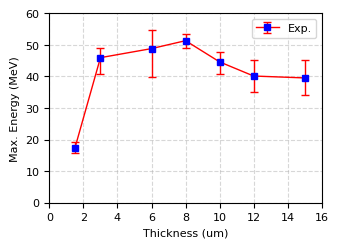

In [62]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

e_err = np.stack([avee - mine, maxe - avee])

ax.errorbar(thkn, avee, yerr=e_err, linewidth=1, 
            # marker='s', 
            markersize=5, 
            marker='s', markerfacecolor='blue', markeredgecolor='blue', linestyle='-', color='red', capsize=3,
            # color='blue', 
            label='Exp.')

ax.set_xlim([0,16])
ax.set_ylim([0,60])
ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Thickness (um)')
ax.set_ylabel('Max. Energy (MeV)')
ax.legend()
fig.set_size_inches(width, height)
fig.tight_layout()

plt.show()

In [64]:
fig.savefig('/Users/yao/Desktop/figX_tkn_e.png', dpi=600)